# Efficiency of DC Machine

In [ ]:
# swinburns test data
v_0 = 220
I_l = 2
I_sh = 0.5
R_a = 0.8

I_a0 = I_l - I_sh   # no load current of shunt motor

# no load copper loss

W_cu0 = (I_a0**2) * R_a

# constant losse of the machine
W0 = (v_0 * I_l) - W_cu0

x = []
y = []

a = []
b = []
# efficiency of a dc motor
#print('---motoer efficiency-----')
for I_M in range(2,15,1):
    inp_power_M = v_0 * I_M
    out_power_M = (inp_power_M - W0) - (I_M - I_sh)**2 * (R_a)
    Efficiency_m = (out_power_M/inp_power_M) * 100
    x.append(I_M)
    y.append(Efficiency_m)
#print('-----genertor efficiency------')
#efficiency of the dc generator
for I_G in range(2,15,1):
    out_power_G = v_0 * I_G
    inp_power_G = (out_power_G + W0) + (I_G + I_sh)**2 * (R_a)
    Efficiency_G = (out_power_G/inp_power_G) * 100
    a.append(I_G)
    b.append(Efficiency_G)

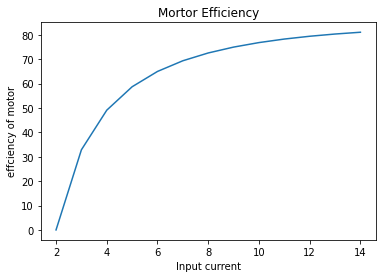

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.title('Mortor Efficiency')
plt.xlabel('Input current')
plt.ylabel('effciency of motor')
plt.show()

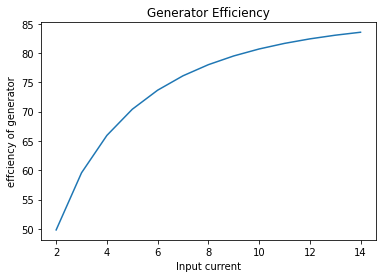

In [ ]:
plt.plot(a,b)
plt.title('Generator Efficiency')
plt.xlabel('Input current')
plt.ylabel('effciency of generator')
plt.show()

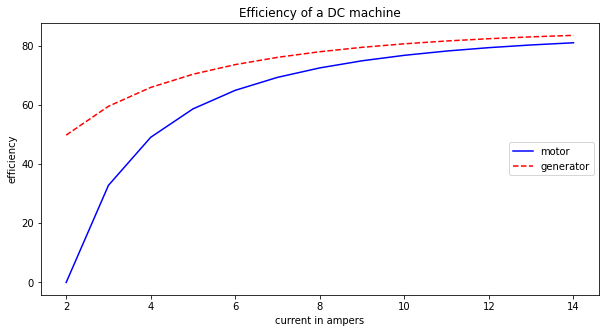

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(x,y,'b-')
plt.plot(a,b,'r--')
plt.title('Efficiency of a DC machine')
plt.xlabel('current in ampers')
plt.ylabel('efficiency')
plt.legend(['motor','generator'],loc = 7)
#plt.legend.loc('lower right')
plt.show()

# Efficiency of the Transformer

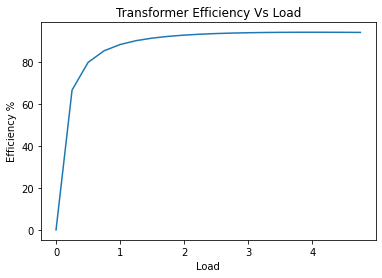

In [ ]:
# Transformer efficiency
import numpy as np
w0 = 100  # watt meter reading in oc test
Wc = 200  # watt meter ra=eading in sc test at full load
kva = 4   # Rating of transformer
pf =0.8   # power factor of load
efficiency = [] 
kvl = np.arange(0,5,0.25)
for l in kvl:
    output = l * pf
    Input = output + ((w0 + 100*((l/kva)**2))/1000)
    efficiency.append((output/Input)*100)

plt.plot(kvl,efficiency)
plt.xlabel('Load')
plt.ylabel('Efficiency %')
plt.title('Transformer Efficiency Vs Load')
plt.show()

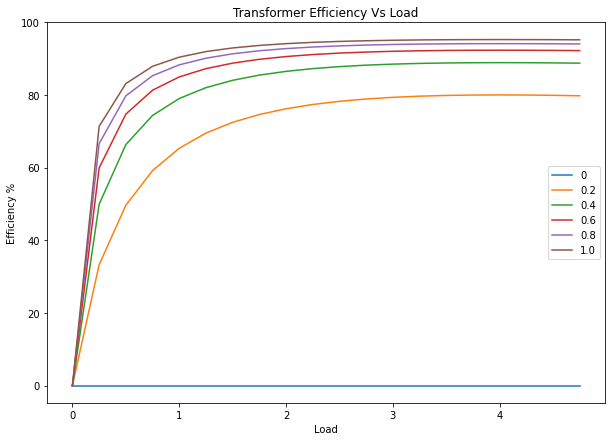

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
w0 = 100  # watt meter reading in oc test
Wc = 200  # watt meter ra=eading in sc test at full load
kva = 4   # Rating of transformer
pf = np.arange(0,1.2,0.2)   # power factor of load
efficiency = [] 
kvl = np.arange(0,5,0.25)
for j in pf:
    for l in kvl:
        output = l * j
        Input = output + ((w0 + 100*((l/kva)**2))/1000)
        efficiency.append((output/Input)*100)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.plot(kvl,efficiency[0:20])
plt.plot(kvl,efficiency[20:40])
plt.plot(kvl,efficiency[40:60])
plt.plot(kvl,efficiency[60:80])
plt.plot(kvl,efficiency[80:100])
plt.plot(kvl,efficiency[100:120])
plt.legend(['0','0.2','0.4','0.6','0.8','1.0'], loc = 7)
plt.xlabel('Load')
plt.ylabel('Efficiency %')
plt.title('Transformer Efficiency Vs Load')
plt.show()

# Instantenious Current and Power

In [ ]:
import math
pi = math.pi
v_m = 100
z = 1.25
gama = 60
theta_v = 0
theta_i = theta_v - gama
theta = ((theta_v - theta_i)*pi)/180
i_m = v_m/z
wt = np.arange(0,7,0.05) ; v = [] ; i = [] ; p = []
for k in wt:
    v.append(v_m*math.cos(k))
    i.append(i_m*math.cos((k + 60/180)))
    
#v = v_m*math.cos(wt)
#i = i_m*math.cos((wt + theta_i*pi)/180)
p = [a*b for (a,b) in zip(v,i)]
V = v_m/math.sqrt(2)
I = i_m/math.sqrt(2)
P = V*I*math.cos(theta)
Q = V*I*math.sin(theta)
S = P + 1j*Q
#pr = P*(1 + math.cos(2*(wt + theta_v)))
#px = Q * math.sin(2 * (wt + theta_v))


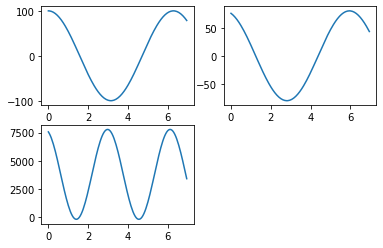

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(2,2,1)
plt.plot(wt,v)

plt.subplot(2,2,2)
plt.plot(wt,i)

plt.subplot(2,2,3)
plt.plot(wt, p)
plt.show()

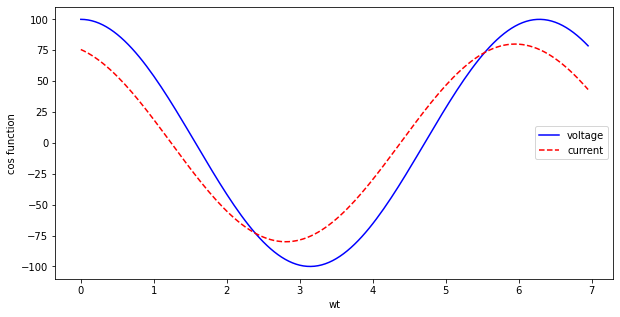

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(wt,v,'b-')
plt.plot(wt,i,'r--')
#plt.plot(wt,p,'g--')
#plt.title('Efficiency of a DC machine')
plt.xlabel('wt')
plt.ylabel('cos function')
plt.legend(['voltage','current'],loc = 7)
#plt.legend.loc('lower right')
plt.show()

## Load Visualization Per Day

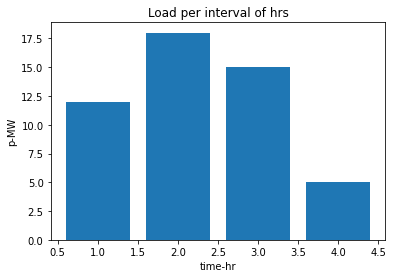

In [ ]:
import matplotlib.pyplot as plt
data = [0,2,6,2,6,5,6,9,10,9,12,15,12,14,12,14,16,14,16,18,16,18,20,18,20,22,16,22,23,12,23,24,6]

load = data[2::3]                 # column array of load data
start_time = data[0::3]
end_time = data[1::3]
demand_interval = [l2 - l1 for (l1,l2) in zip(start_time,end_time)]      # cloumn array of demnad interval
w = [l3 * l4 for (l3,l4) in zip(load,demand_interval)]
#w = load * demand_interval        # total energy ,area under the curve
#pavg = w/sum(demand_interval)     # Average load
#peak = max(load)                  # peak load
#LF = (pavg/peak)*100              # percent load factor
x = demand_interval
y = load
plt.bar(x,y)
plt.xlabel('time-hr')
plt.ylabel('p-MW')
plt.title('Load per interval of hrs')
plt.show()